<a href="https://colab.research.google.com/github/Suchitra90/My_python_projects/blob/main/Covid_19_Project_(M).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the dataset
df = pd.read_csv('/content/drive/MyDrive/covid_19_clean_complete (4).csv')

In [ ]:
# Read the dataset
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# Rename the columns
df.rename(columns={"Province/State":'State','Country/Region':'Country'},inplace=True)

In [ ]:
# Read the columns
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
# Another way of finding the value counts
df.groupby('Date')['Date'].count()

,Date
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
df['Date'].max()

'2020-07-27'

In [ ]:
# Check for top date results
top_date = df[df['Date'] == '2020-07-22']
top_date['Country'].nunique()

187

In [ ]:
# Check for null values
df.isnull().sum()

,0
State,34404
Country,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
# We can drop some columns from the datset as they are not affected and usefull for the dataset

In [ ]:
# In the recent date I want to know how many cases are present
top_date.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,35727,1190,23924,10613
1,Albania,4358,120,2463,1775
2,Algeria,24872,1111,16983,6778
3,Andorra,889,52,803,34
4,Angola,812,33,221,558
...,...,...,...,...,...
182,West Bank and Gaza,9398,66,1950,7382
183,Western Sahara,10,1,8,1
184,Yemen,1640,458,751,431
185,Zambia,3583,128,1677,1778


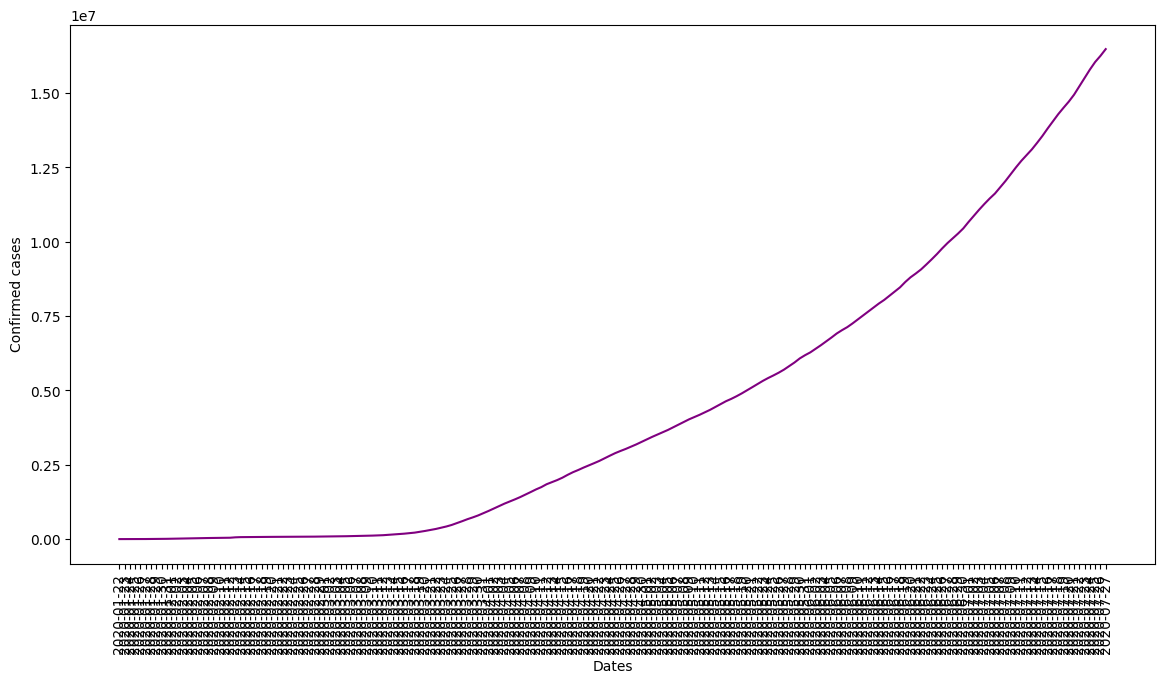

In [ ]:
# Plot for confirmed cases
confirmed_cases = df.groupby('Date')['Confirmed'].sum()
confirmed_cases = pd.DataFrame(confirmed_cases)
plt.figure(figsize=(14,7))
sns.lineplot(data = confirmed_cases,x='Date',y='Confirmed',color='purple')
plt.xlabel('Dates')
plt.ylabel('Confirmed cases')
plt.xticks(rotation=90)
plt.show()

In [ ]:
confirmed_cases

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-07-23,15510481
2020-07-24,15791645
2020-07-25,16047190


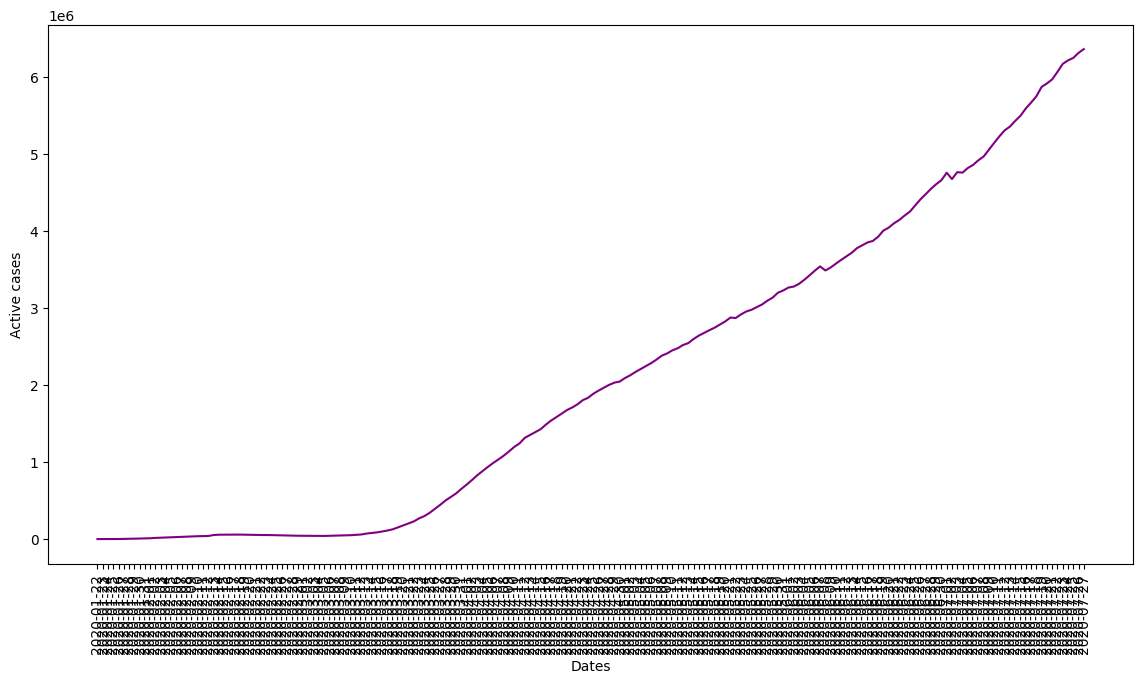

In [ ]:
Active_cases = df.groupby('Date')['Active'].sum().reset_index()
Active_cases = pd.DataFrame(Active_cases)
plt.figure(figsize=(14,7))
sns.lineplot(data = Active_cases,x='Date',y='Active',color='purple')
plt.xlabel('Dates')
plt.ylabel('Active cases')
plt.xticks(rotation=90)
plt.show()

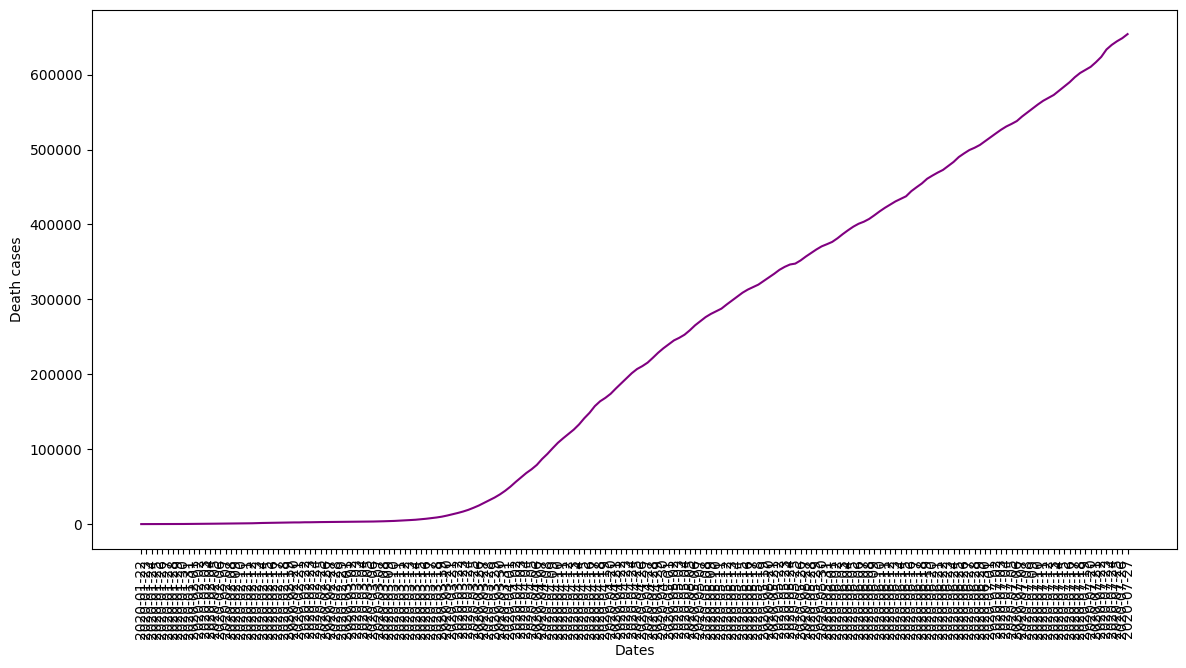

In [ ]:
Death_cases = df.groupby('Date')['Deaths'].sum().reset_index()
Death_cases = pd.DataFrame(Death_cases)
plt.figure(figsize=(14,7))
sns.lineplot(data = Death_cases,x='Date',y='Deaths',color='purple')
plt.xlabel('Dates')
plt.ylabel('Death cases')
plt.xticks(rotation=90)
plt.show()

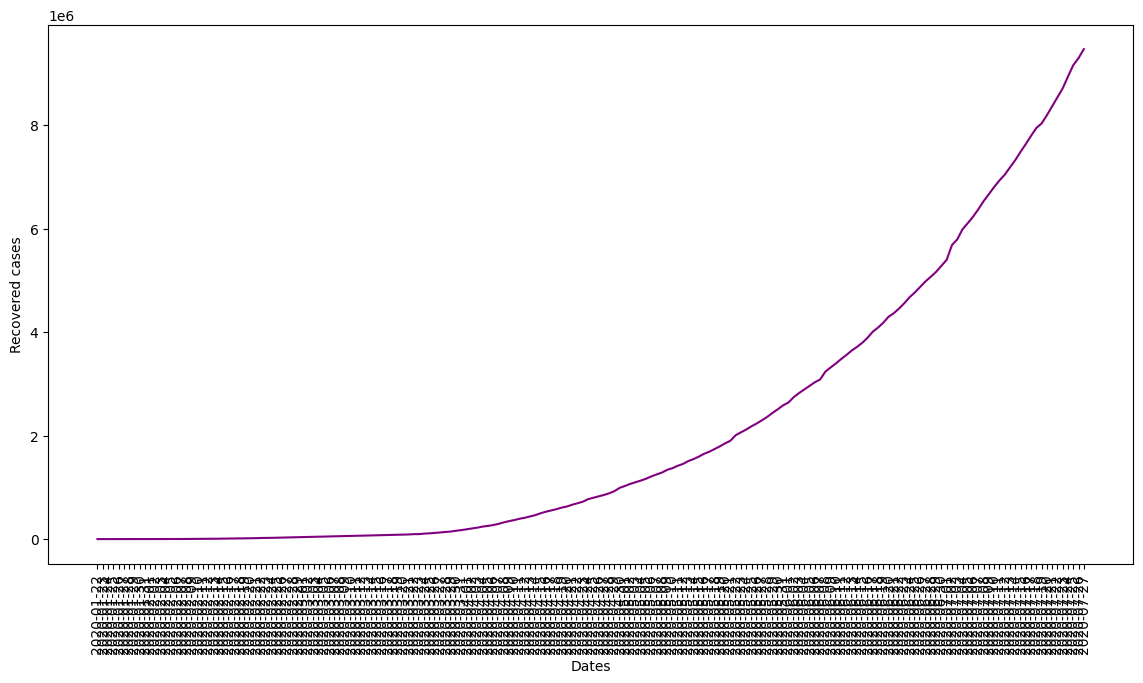

In [ ]:
Recovered_cases = df.groupby('Date')['Recovered'].sum().reset_index()
Recovered_cases = pd.DataFrame(Recovered_cases)
plt.figure(figsize=(14,7))
sns.lineplot(data = Recovered_cases,x='Date',y='Recovered',color='purple')
plt.xlabel('Dates')
plt.ylabel('Recovered cases')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Death Cases')

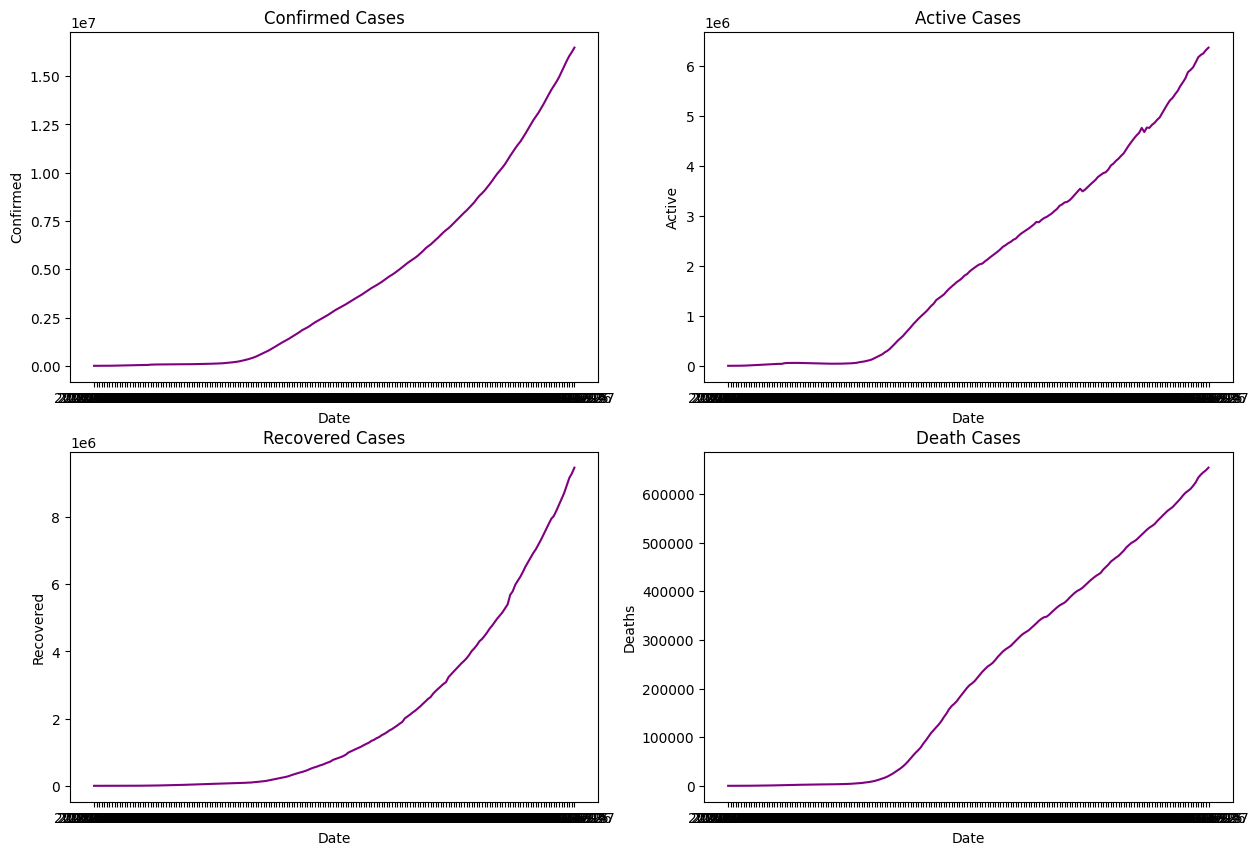

In [ ]:
# Plot all the cases in a subplots
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.lineplot(data = confirmed_cases,x='Date',y='Confirmed',color='purple')
plt.title('Confirmed Cases')

plt.subplot(2,2,2)
sns.lineplot(data = Active_cases,x='Date',y='Active',color='purple')
plt.title('Active Cases')

plt.subplot(2,2,3)
sns.lineplot(data = Recovered_cases,x='Date',y='Recovered',color='purple')
plt.title('Recovered Cases')

plt.subplot(2,2,4)
sns.lineplot(data = Death_cases,x='Date',y='Deaths',color='purple')
plt.title('Death Cases')

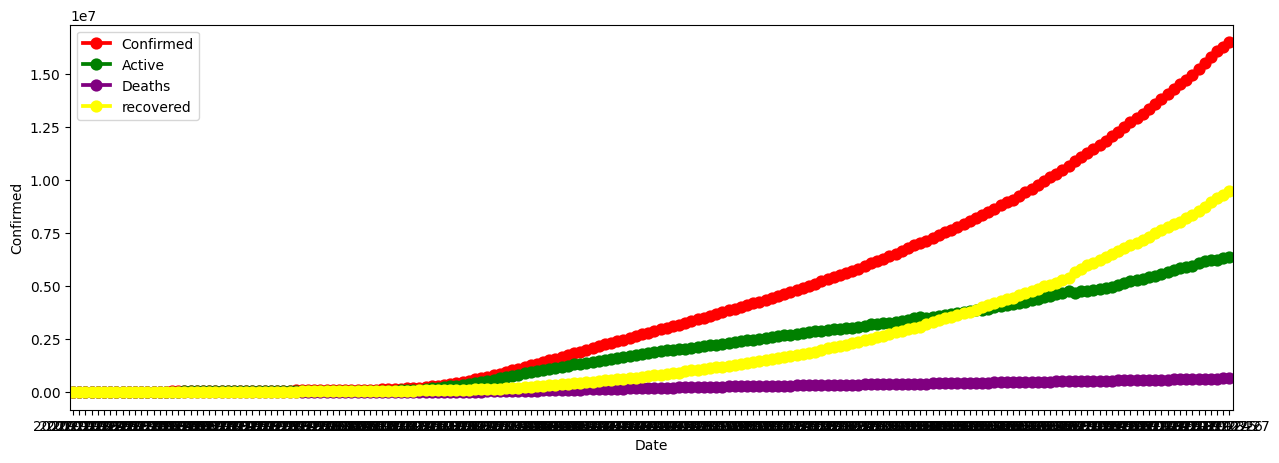

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(data=confirmed_cases,x='Date',y='Confirmed',color='red',label='Confirmed')
sns.pointplot(data=Active_cases,x='Date',y='Active',color='green',label='Active')
sns.pointplot(data=Death_cases,x='Date',y='Deaths',color='purple',label='Deaths')
sns.pointplot(data=Recovered_cases,x='Date',y='Recovered',color='yellow',label='recovered')
plt.show()

In [ ]:
df.groupby('Country')['Active'].sum().sort_values(ascending=False)

,Active
Country,
US,156981121
Brazil,31094060
United Kingdom,22624595
Russia,19668578
India,15987913
...,...
Saint Kitts and Nevis,477
Dominica,400
Saint Lucia,376


In [ ]:
Country_wise_confirmed_cases = df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)
Country_wise_confirmed_cases.head()

,Confirmed
Country,
US,224345948
Brazil,89524967
Russia,45408411
India,40883464
Spain,27404045


In [ ]:
# US
US = df[df['Country'] == 'US']
US.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [ ]:
# China
China = df[df['Country'] == 'China']
China.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [ ]:
# India
India = df[df['Country'] == 'India']
India.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


### Model Building

In [ ]:
# In this we are going to use prophet function for time series forecasting as it is developed by faceook
# This function is used for data that has strong seasonal effect (weekly or monthly)
# y(t) = g(t)+s(t)+h(t)+e(t)

# y(t) = the value at that time---number of cases
# g(t) = trend function
# s(t) = seasonality function
# h(t) = holiday effects
# e(t) = error

# It will also provide confidence interval alss

#advantages

# directly handle missing data
# trend detection
# easy to add regarding holidays
# work well with daily and weekly data
# bussiness
# short term forecasting works well

# when to use prophet
# trend+seasonality+holiday are present in the data then this function is optimal

# In Arima,Sarima models we can use only one column and date is considered as index in it. But in this prophet model we can considered 2 columns
# which is nothing but date column and numerical column.

In [ ]:
!pip install prophet

In [ ]:
# The column names should be ds and y and it is mandatory

In [ ]:
confirmed_cases = df.groupby('Date')['Confirmed'].sum().reset_index()

In [ ]:
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
confirmed_cases.columns = ['ds','y']

In [ ]:
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
# Training the model
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps86jatpk/hvz44h6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps86jatpk/q5wyuh3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27692', 'data', 'file=/tmp/tmps86jatpk/hvz44h6b.json', 'init=/tmp/tmps86jatpk/q5wyuh3c.json', 'output', 'file=/tmp/tmps86jatpk/prophet_model1gzuylxx/prophet_model-20250527094215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=7)

In [ ]:
forecasted = model.predict(future)

In [ ]:
forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.328440e+05,8.365625e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.125335e+05,9.276799e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.852245e+04,1.123038e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.206514e+04,1.087570e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-8.993541e+04,1.161605e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.664005e+07,1.685133e+07,1.673750e+07,1.675194e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685059e+07,1.706230e+07,1.693351e+07,1.696327e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.704203e+07,1.728246e+07,1.713072e+07,1.717541e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725671e+07,1.747922e+07,1.732463e+07,1.738832e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
# ds : this col contains the date for which we the predictions have been made. it stands for datestamp

# yhat : this is the predicted value for the given date in ds columns,it represents themodels best estimate for the point in time

# yhat upper ---upper bound of the predicted value

# yhat lower --lower bound of the predicted


# y = actual numbet of covis cases

# yhat = predicted number of covid cases --- forecasting

In [ ]:
forecasted[['yhat_upper','yhat','yhat_lower']]

,yhat_upper,yhat,yhat_lower
0,8.365625e+04,-2.067684e+04,-1.328440e+05
1,9.276799e+04,-8.050948e+03,-1.125335e+05
2,1.123038e+05,5.827455e+03,-9.852245e+04
3,1.087570e+05,1.217668e+04,-9.206514e+04
4,1.161605e+05,8.405020e+03,-8.993541e+04
...,...,...,...
190,1.685133e+07,1.674391e+07,1.664005e+07
191,1.706230e+07,1.695910e+07,1.685059e+07
192,1.728246e+07,1.716676e+07,1.704203e+07
193,1.747922e+07,1.736430e+07,1.725671e+07


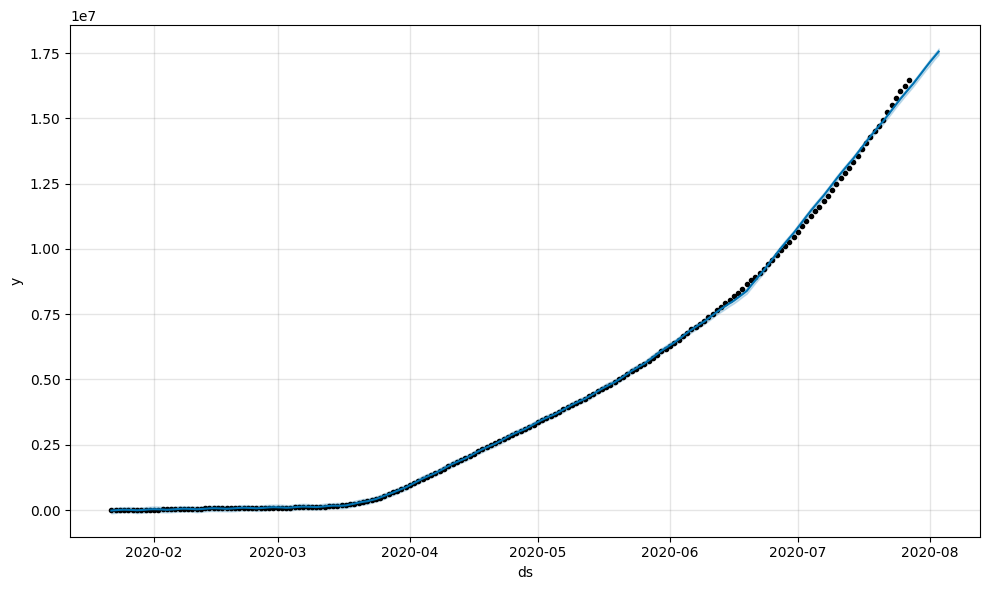

In [ ]:
model.plot(forecasted)
plt.show()
# from the graph we can say that points are our actual values
# Blue line represents the predicted data and here we had predicted for period of 7 days that is why have line bit enlarged than points

In [ ]:
import plotly
import plotly.express as px

In [ ]:
world = df.groupby(['Country'])[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()

In [ ]:
figure = px.choropleth(world,locations = 'Country',locationmode = 'country names',color = 'Active',hover_name = 'Country',range_color = [1,100000],color_continuous_scale= 'reds',title = 'world map for active cases')
figure.show()